In [225]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold

import matplotlib.pyplot as plt

import seaborn as sns

from imblearn import FunctionSampler

In [226]:
df= pd.read_csv('wine.data')
df.head()

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [227]:
#Checkin Null Value and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280_od315_of_diluted_wines  178 non-null    float64
 13  proli

In [228]:
df.describe()

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

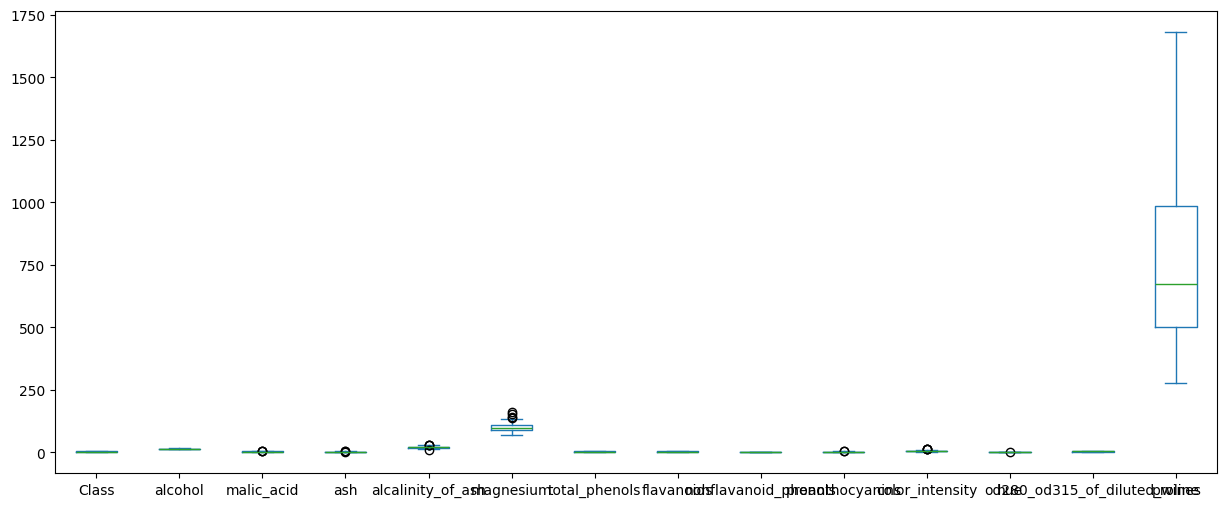

In [229]:
df.plot.box(figsize=(15,6))

In [230]:
def IQR_Outliers (X, features):

    print('Number of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))

    out_indexlist = []

    for col in features:
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)

        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)

        out_indexlist.extend(outliers_index)

    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)


IQR_Outliers(df, df.columns.tolist())

Number of features:  14
Features:  ['Class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']
Number of samples:  178

Feature:  Class
Upper and Lower limits:  6.0 -2.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  alcohol
Upper and Lower limits:  15.650000000000002 10.389999999999997
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  malic_acid
Upper and Lower limits:  5.3025 -0.6174999999999997
Number of outliers:  3
Outliers Index:  [123, 137, 173]
Outliers:  [5.8  5.51 5.65]

Feature:  ash
Upper and Lower limits:  3.0787500000000003 1.6887499999999998
Number of outliers:  3
Outliers Index:  [25, 59, 121]
Outliers:  [3.22 1.36 3.23]

Feature:  alcalinity_of_ash
Upper and Lower limits:  27.950000000000003 10.749999999999998
Number of outliers:  4
Outliers Index:  [59, 73, 121, 127]
Outlie

In [231]:
def CustomSampler_IQR (X, y):

    features = X.columns
    df = X.copy()
    df['variety'] = y

    indices = [x for x in df.index]
    out_indexlist = []

    for col in features:
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off

        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values
        out_indexlist.extend(outliers_index)
    out_indexlist = list(set(out_indexlist))

    clean_data = np.setdiff1d(indices,out_indexlist)

    return X.loc[clean_data], y.loc[clean_data]

Ada beberapa kolom yang memiliki outlier, dan jumlah baris dengan outrlier adalah 17. Karena jumlah outlier hanya kurang dari 10% data, dapat di drop.

In [232]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Ada beberapa fitur yang memiliki korelasi linear tinggi (>0.7)
Seperti flavanoids dengan total phenols dan od280 dengan flavanoids

In [233]:
#Proposi kelas
df.Class.value_counts(normalize=True).round(3)

,proportion
Class,
2,0.399
1,0.331
3,0.270


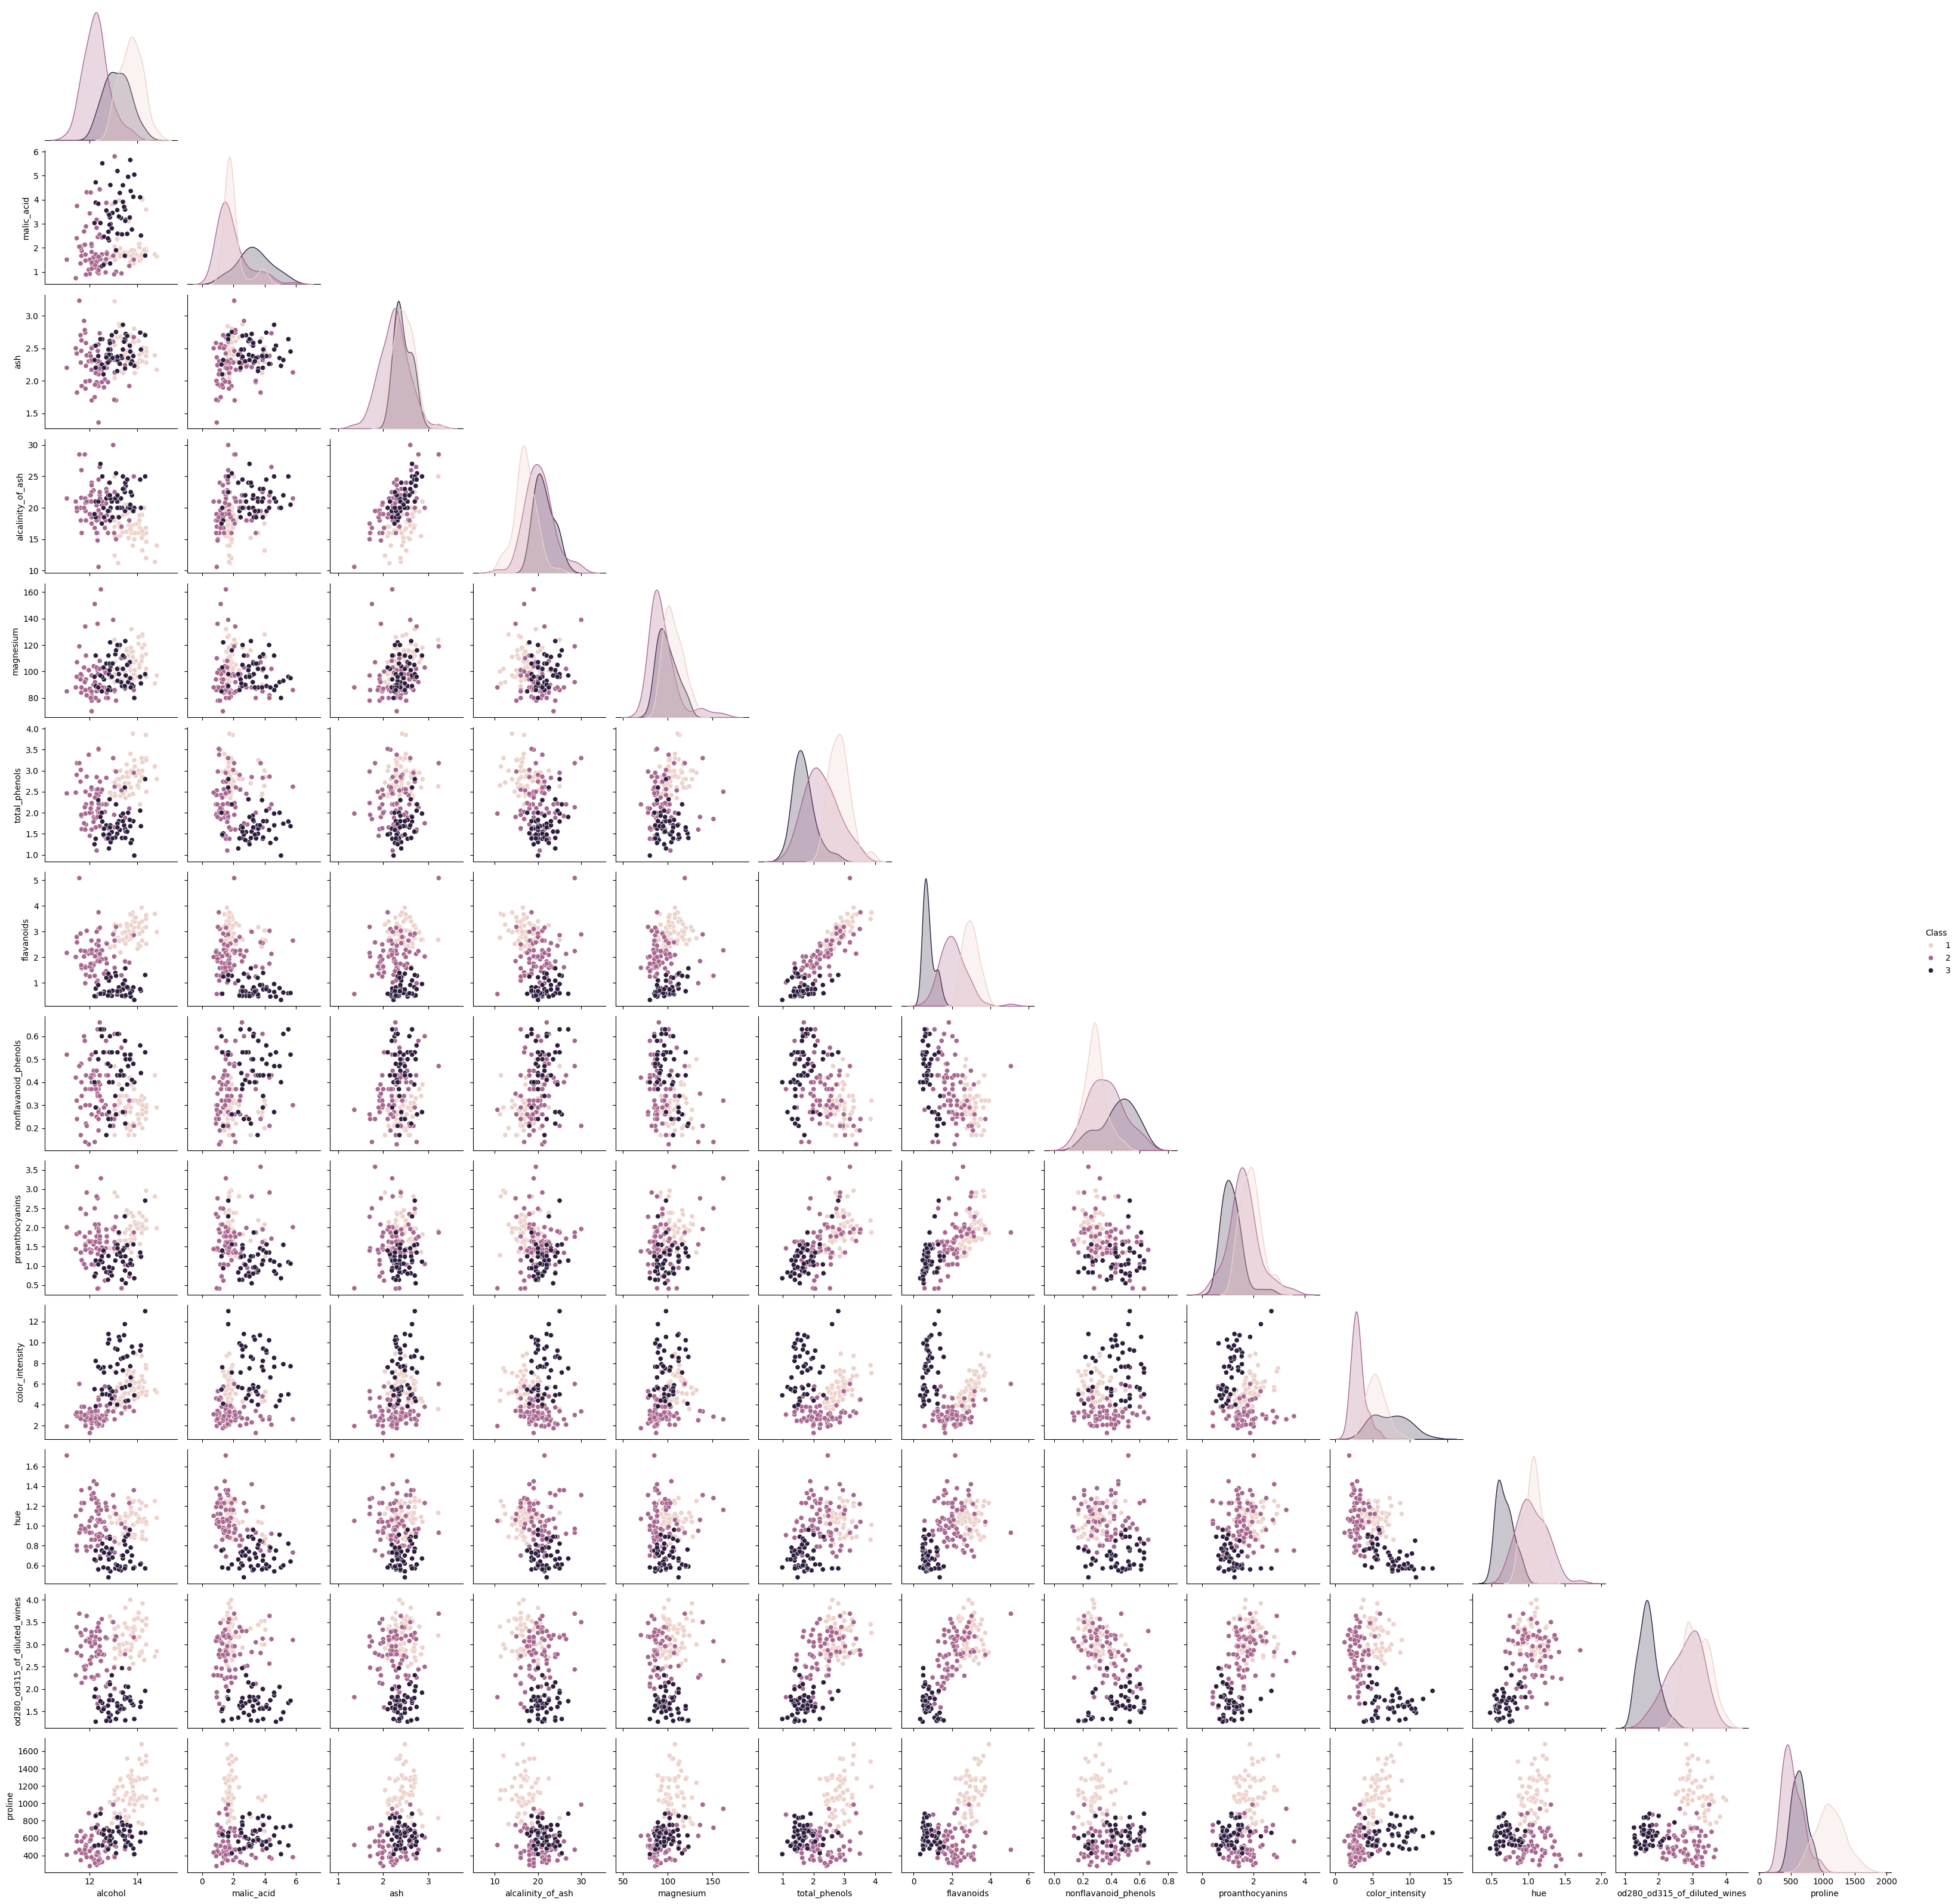

In [234]:
sns.pairplot(df, hue='Class', corner=True)
plt.show()

Peta Clustering terlihat baik pada beberapa kombinasi variabel seperti proline + flavanoids

In [235]:
# OD280 dirasa mempengaruhi kolom lain, penghilangan kolom ini saat dicoba membuat performa meningkat
x = df.drop(columns=['Class','od280_od315_of_diluted_wines'])
y = df['Class']

In [236]:
from sklearn.model_selection import GridSearchCV

parameters={'max_iter':[100000], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'tol':[1e-5, 1e-10, 1e-13],'fit_intercept':[True,False]}
logistic=LogisticRegression()
clf=GridSearchCV(logistic,parameters)
clf.fit(x, y)
sorted(clf.cv_results_.keys())
clf

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:311: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False], 'max_iter': [100000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [1e-05, 1e-10, 1e-13]})

In [244]:
features = x.columns.tolist()

In [245]:
pipe=Pipeline([
    # To remove outlier, ('Outlier_removal', FunctionSampler(func=CustomSampler_IQR, validate = False)),
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(max_iter=100000, solver='newton-cholesky', tol=1e-05))
])

scores=cross_val_score(pipe,x,y,cv=5)

print(scores.mean(),scores.std())

0.9944444444444445 0.011111111111111117
